In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
import string

# Data Analysis on Amazon Purchases
+ from 31-Dec-2016_to_08-Oct-2019 on the gmail account
+ from 01-Jan-2013_to_08-Oct-2019 on the yahoo account

## Data Prepocessing 

In [2]:
gmail_df = pd.read_csv("data/amazonhistory_gmail.csv")
yahoo_df = pd.read_csv("data/amazonhistory_yahoo.csv")

In [3]:
df = gmail_df.append(yahoo_df)

In [4]:
df.columns

Index(['Order Date', 'Order ID', 'Title', 'Category', 'ASIN/ISBN',
       'UNSPSC Code', 'Website', 'Release Date', 'Condition', 'Seller',
       'Seller Credentials', 'List Price Per Unit', 'Purchase Price Per Unit',
       'Quantity', 'Payment Instrument Type', 'Purchase Order Number',
       'PO Line Number', 'Ordering Customer Email', 'Shipment Date',
       'Shipping Address Name', 'Shipping Address Street 1',
       'Shipping Address Street 2', 'Shipping Address City',
       'Shipping Address State', 'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number', 'Item Subtotal', 'Item Subtotal Tax',
       'Item Total', 'Tax Exemption Applied', 'Tax Exemption Type',
       'Exemption Opt-Out', 'Buyer Name', 'Currency', 'Group Name'],
      dtype='object')

In [5]:
# df.columns[i] --> the column names
# df[df.columns[i]].unique() --> the unique values in each columns
# Keep a list of all the columns that only have one unique value.
remove_lst = [[df.columns[i],df[df.columns[i]].unique()] for i in range(df.shape[1]) 
              if len(df[df.columns[i]].unique()) == 1]
# Get all the columns names to be remove
remove_lst = [remove_lst[i][0] for i in range(len(remove_lst))]
df = df.drop(remove_lst, axis=1)
df.shape

(449, 29)

In [6]:
df.head(2)

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Release Date,Condition,Seller,Seller Credentials,...,Shipping Address City,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Exemption Opt-Out,Buyer Name
0,01/22/17,104-0813381-8012232,Gillette Fusion ProGlide Power Men's Razor wit...,Health and Beauty,B00J3MPS4E,50500000.0,NaN,new,Amazon.com,NaN,...,BURLINGTON,27215-7731,Shipped,USPS(9200199999978703329438),$11.34,$0.73,$12.07,NaN,NaN,Thien
1,02/15/17,111-4530030-9275427,Generic VHEM Fidget1 Cube Relieves Stress & An...,NaN,B01N3UN0QE,NaN,NaN,new,Keith Smith Case,NaN,...,GREENSBORO,27413,Shipped,EUB(LT839717071CN),$6.59,$0.00,$6.59,NaN,NaN,Thien


In [7]:
# Clean out the columns space
df.columns = df.columns.str.replace(" ","_")

In [8]:
# Convert the order_date into date data type
df["date"] = pd.to_datetime(df.Order_Date)

In [9]:
df.Title = df.Title.apply(lambda x: x.translate(string.punctuation))
df.Title = df.Title.apply(lambda x: x.lower())

In [10]:
# Method that strip away the dollar sign and cast float datatype on each columns
def num_conversion(df,lst):
    for i in lst:
        df[i] =  [x[1:] for x in df[i]]
        df[i] = df[i].astype(float)

In [11]:
# get the column names that need to be float values.
num_cols = df.iloc[:,df.columns.str.contains("total", case=False)].columns
num_cols = num_cols.append(df.iloc[:,df.columns.str.contains("price", case=False)].columns)
num_conversion(df,num_cols)

In [12]:
df.columns

Index(['Order_Date', 'Order_ID', 'Title', 'Category', 'ASIN/ISBN',
       'UNSPSC_Code', 'Release_Date', 'Condition', 'Seller',
       'Seller_Credentials', 'List_Price_Per_Unit', 'Purchase_Price_Per_Unit',
       'Quantity', 'Payment_Instrument_Type', 'Ordering_Customer_Email',
       'Shipment_Date', 'Shipping_Address_Name', 'Shipping_Address_Street_1',
       'Shipping_Address_Street_2', 'Shipping_Address_City',
       'Shipping_Address_Zip', 'Order_Status',
       'Carrier_Name_&_Tracking_Number', 'Item_Subtotal', 'Item_Subtotal_Tax',
       'Item_Total', 'Tax_Exemption_Applied', 'Exemption_Opt-Out',
       'Buyer_Name', 'date'],
      dtype='object')

In [13]:
df.describe()

,UNSPSC_Code,List_Price_Per_Unit,Purchase_Price_Per_Unit,Quantity,Item_Subtotal,Item_Subtotal_Tax,Item_Total
count,4.030000e+02,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,4.830824e+07,52.363385,26.979087,1.048998,27.679421,0.516793,28.196214
std,8.961879e+06,162.955920,40.176954,0.294753,40.326205,1.664941,41.113669
min,1.011000e+07,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,4.321000e+07,0.000000,8.750000,1.000000,8.880000,0.000000,8.950000
50%,5.214000e+07,14.290000,14.400000,1.000000,14.990000,0.000000,15.640000
75%,5.313160e+07,39.990000,28.950000,1.000000,29.950000,0.000000,29.990000
max,8.515000e+07,2495.000000,437.490000,4.000000,437.490000,18.220000,437.490000


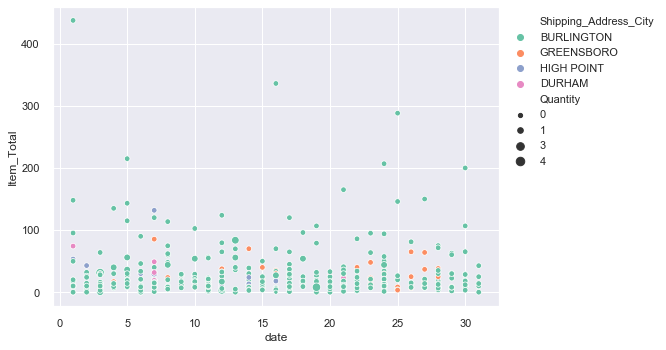

In [14]:
sns.scatterplot(df.date.dt.day,df.Item_Total, hue=df.Shipping_Address_City, size= df.Quantity,
                palette="Set2")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

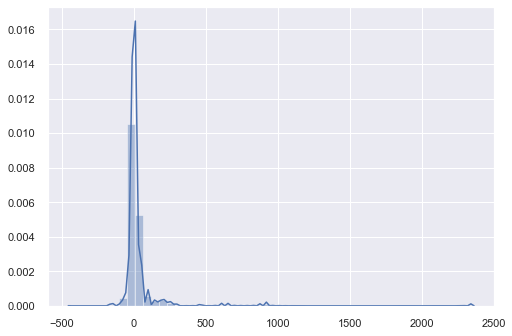

In [15]:
sns.distplot(df.List_Price_Per_Unit - df.Purchase_Price_Per_Unit)
plt.show()

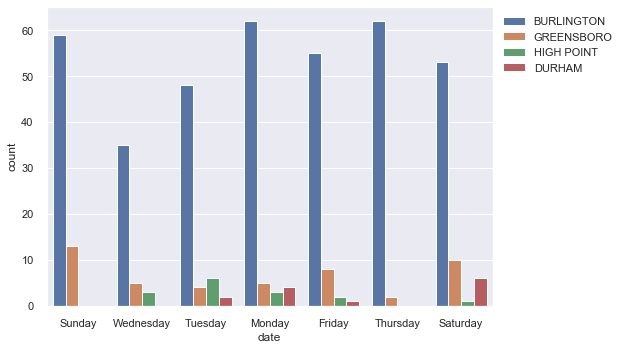

In [16]:
sns.countplot(df.date.dt.weekday_name, hue=df.Shipping_Address_City)
plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

In [17]:
df.Item_Total.max()

437.49

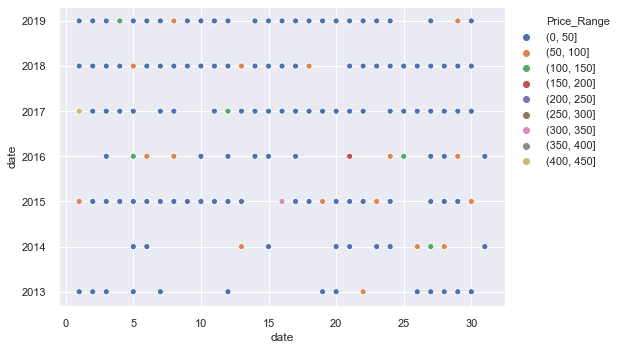

In [18]:
df["Price_Range"] = pd.cut(df.Item_Total, bins=[x for x in range(0,500,50)])
sns.scatterplot(df.date.dt.day,df.date.dt.year, hue=df.Price_Range)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

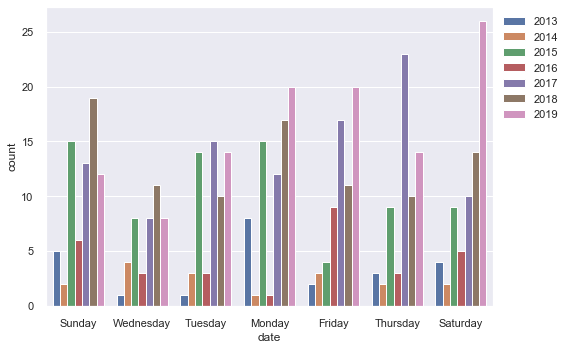

In [19]:
sns.countplot(df.date.dt.weekday_name, hue=df.date.dt.year)
plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

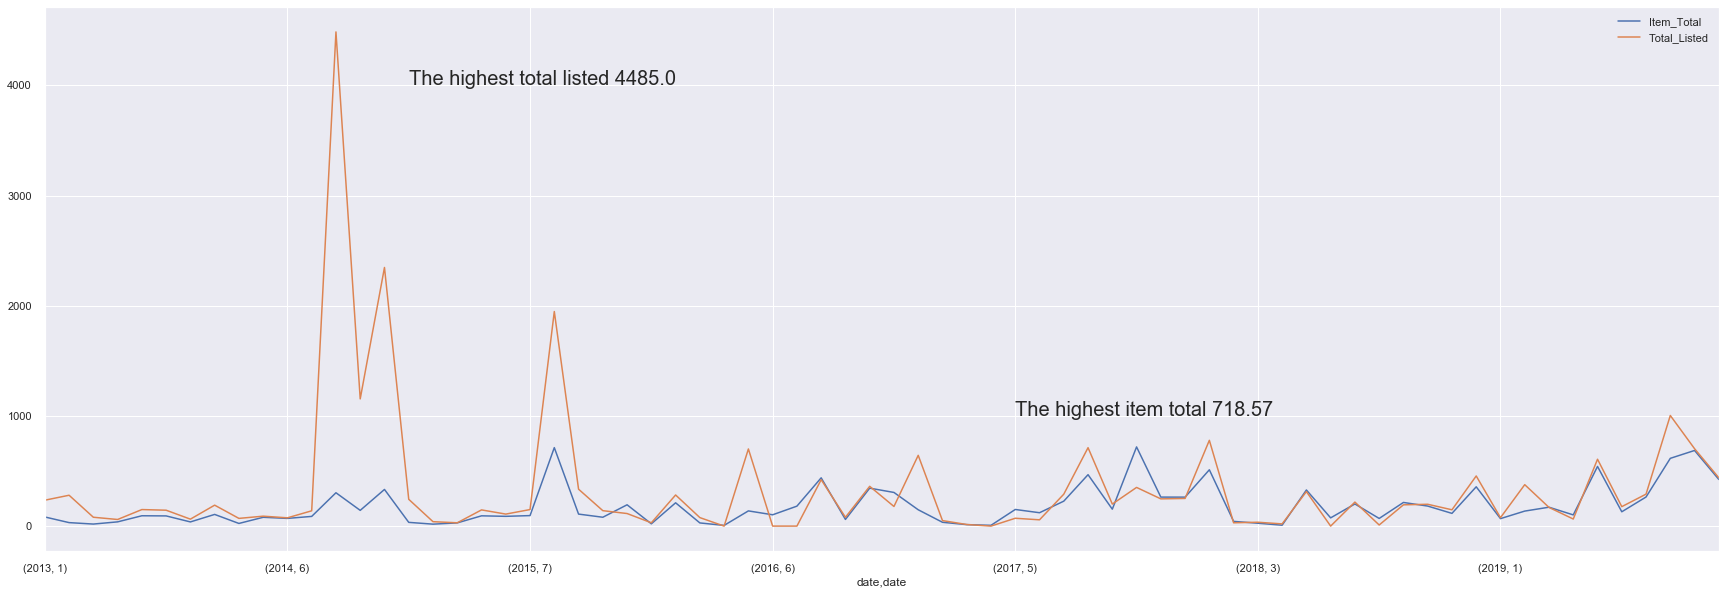

In [20]:
# Get the total listed price
df['Total_Listed'] = df.List_Price_Per_Unit * df.Quantity

# Group the dataframe by the year and month
df_date = df.groupby(by=[df.date.dt.year, df.date.dt.month])

# Graph the sum of the total purchasedand the listed price
fig, ax = plt.subplots(figsize=(30,10))
df_date.sum().Item_Total.plot(ax=ax,legend=True)
df_date.sum().Total_Listed.plot(ax=ax,legend=True)

# Graph the max values
plt.rcParams.update({'font.size': 20})
plt.text(x=15, y=4000, s="The highest total listed "+str(df_date.sum().Total_Listed.max()))
plt.text(x=40, y=1000, s="The highest item total "+str(df_date.sum().Item_Total.max()))

plt.show()

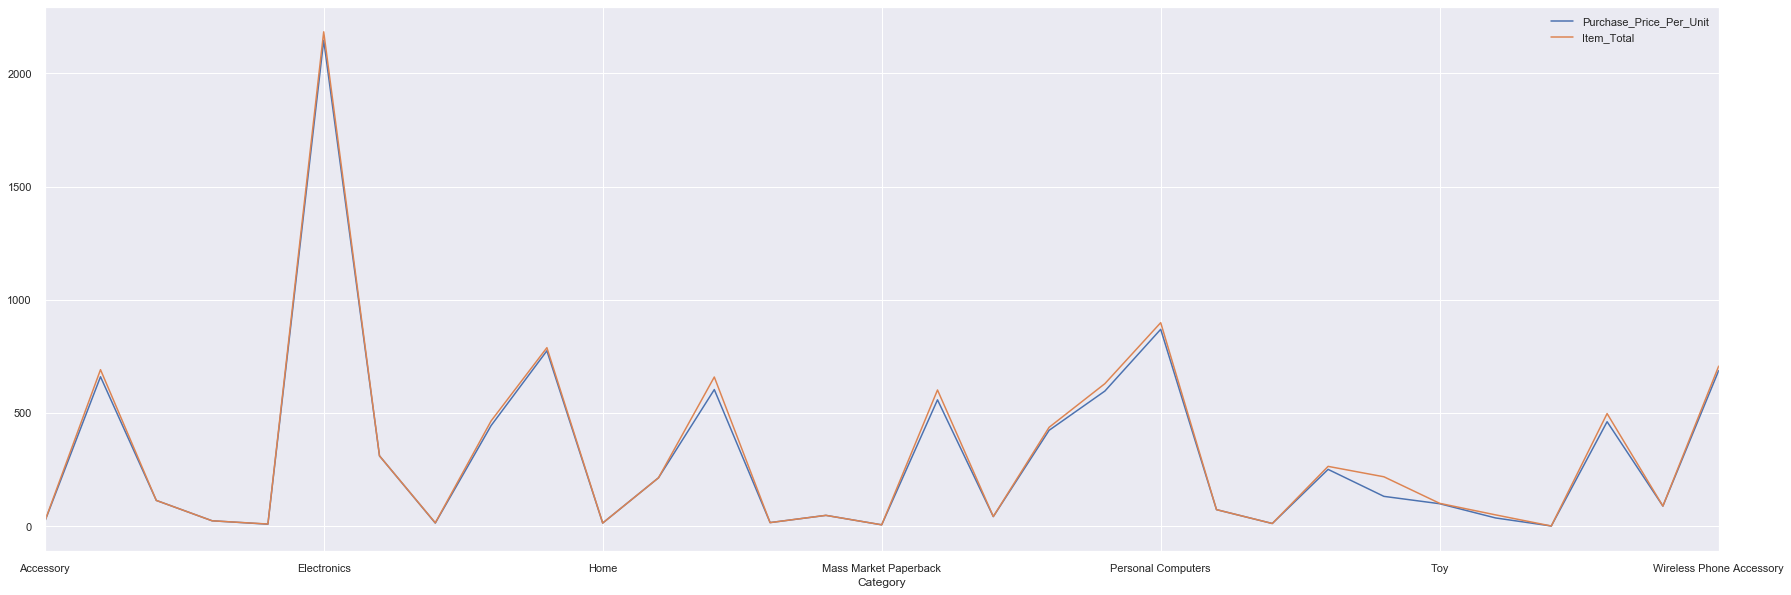

In [21]:
df_categories = df.groupby(by=df.Category)
fig, ax = plt.subplots(figsize=(30,10))
df_categories.sum().loc[:,['Purchase_Price_Per_Unit','Item_Total']].plot(ax=ax,legend=True)
plt.show()

In [22]:
ax.scatter?

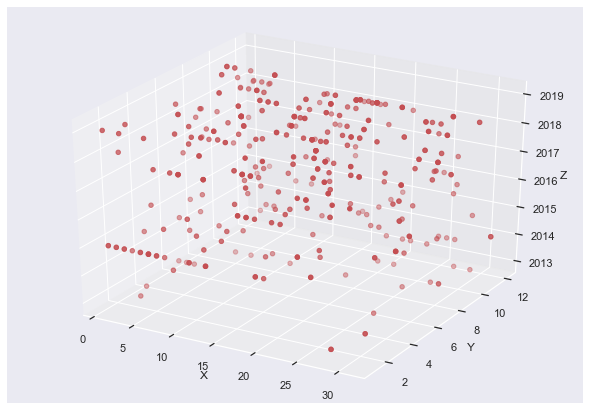

In [24]:
import mpl_toolkits.mplot3d.axes3d as p3

#data is an ndarray with the necessary data and colors is an ndarray with
#'b', 'g' and 'r' to paint each point according to its class

...

fig=plt.figure()
ax = p3.Axes3D(fig)
#colors = ("red", "green", "blue")
ax.scatter(df.date.dt.day,df.date.dt.month,df.date.dt.year,c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [25]:
#import enthought.mayavi.mlab as mylab
from mayavi import mlab
import numpy as np
#x, y, z, value = np.random.random((4, 40))
mlab.points3d(df.date.dt.day,df.date.dt.month,df.date.dt.year,df.Quantity)
mlab.show()

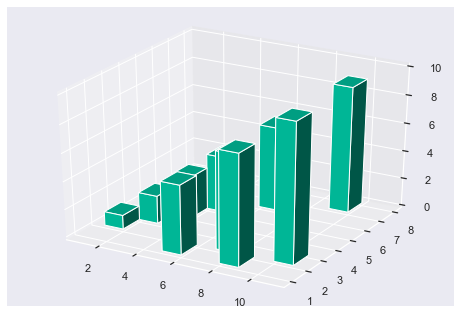

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = [1,2,3,4,5,6,7,8,9,10]
ypos = [2,3,4,5,1,6,2,1,7,2]
num_elements = len(xpos)
zpos = [0,0,0,0,0,0,0,0,0,0]
dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa')
plt.show()